In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# functions

In [2]:
class LinearRegression:
    def __init__(self, degree=1, reg=None, alpha=0.0):
        self.degree = degree
        self.reg = reg
        self.alpha = alpha
        self.w = None
    
    def fit(self, X, y):
        X_poly = self._generate_polynomial_features(X)
        if self.reg == 'l2':
            self.w = self._ridge_regression(X_poly, y)
        elif self.reg == 'l1':
            self.w = self._lasso_regression(X_poly, y)
        else:
            self.w = self._ordinary_least_squares(X_poly, y)
    
    def predict(self, X):
        X_poly = self._generate_polynomial_features(X)
        return X_poly.dot(self.w)
    
    def _generate_polynomial_features(self, X):
        return np.vander(X, self.degree + 1, increasing=True)
    
    def _ordinary_least_squares(self, X, y):
        return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    def _ridge_regression(self, X, y):
        identity_matrix = np.identity(X.shape[1])
        w_ridge = np.linalg.inv(X.T.dot(X) + self.alpha * identity_matrix).dot(X.T).dot(y)
        return w_ridge
    
    def _lasso_regression(self, X, y):
        def soft_threshold(rho, alpha):
            if rho < -alpha:
                return (rho + alpha)
            elif rho > alpha:
                return (rho - alpha)
            else:
                return 0

        w_lasso = np.zeros(X.shape[1])
        n = X.shape[0]
        for _ in range(1000):  # Maximum iterations
            for j in range(X.shape[1]):
                y_pred = X.dot(w_lasso)
                rho = X[:, j].T.dot(y - y_pred) / n
                w_lasso[j] = soft_threshold(rho, self.alpha)

        return w_lasso
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y - y_pred))
        mape = np.mean(np.abs((y - y_pred) / y)) * 100
        r2_score = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)
        print('MSE: {:.6f} \nRMSE: {:.6f} \nMAE: {:.6f} \nR2 Score: {:.6f}% \nMAPE: {:.6}%'.format(mse, rmse, mae, r2_score*100, mape))
    
    def plot_data(self, X, y):
        plt.scatter(X, y, color='#4BA3C3')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.show()
    
    def plot(self, X, y):
        X_pred = np.linspace(X.min(), X.max(), 100)
        y_pred = self.predict(X_pred)
        plt.scatter(X, y, color='#4BA3C3')
        plt.plot(X_pred, y_pred, color='#D62839')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.show()


# data_squared

In [3]:
data = pd.read_csv('../data/data_square.csv')
data.columns = ['area', 'price']
data

,area,price
0,30.0000,-100.0000
1,32.4138,-190.7250
2,34.8276,-269.7980
3,37.2414,-337.2180
4,39.6552,-392.9850
5,42.0690,-437.0990
6,44.4828,-469.5600
7,46.8966,-490.3690
8,49.3103,-499.5240
9,51.7241,-497.0270


In [4]:
data['area'] = data['area'] / 100
data['price'] = data['price'] / 1000

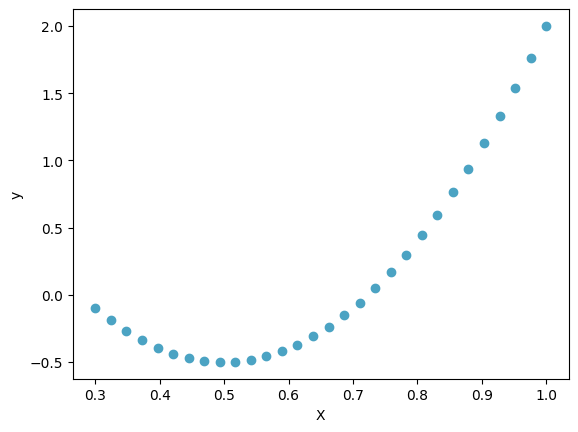

In [5]:
X, y = data['area'].values, data['price'].values
model = LinearRegression(degree=2)
model.plot_data(X, y)

MSE: 0.000000 
RMSE: 0.000002 
MAE: 0.000001 
R2 Score: 100.000000% 
MAPE: 0.000361848%


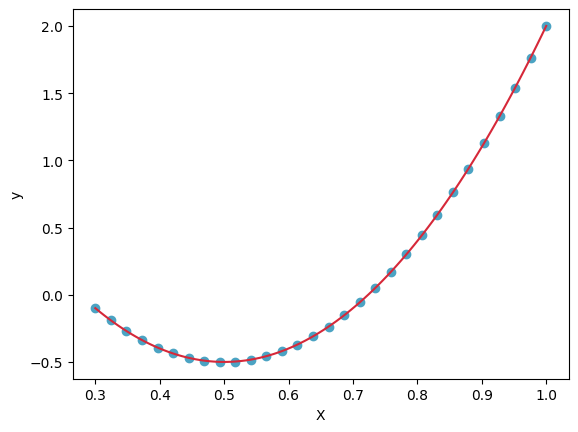

In [6]:
model.fit(X, y)
model.evaluate(X, y)
model.plot(X, y)

# data_polynomial

MSE: 0.314251 
RMSE: 0.560581 
MAE: 0.522691 
R2 Score: 0.000000% 
MAPE: 104.893%


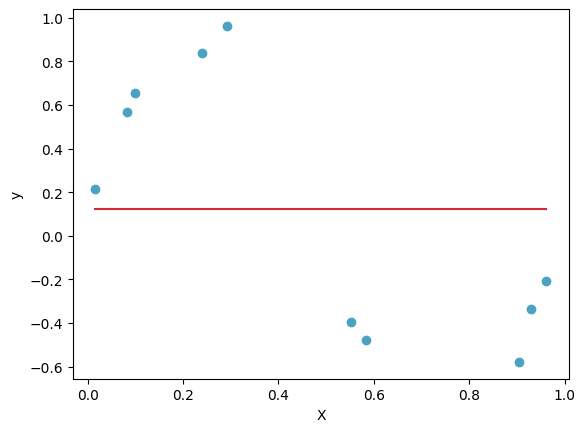

MSE: 0.129986 
RMSE: 0.360535 
MAE: 0.305293 
R2 Score: 58.636329% 
MAPE: 74.5366%


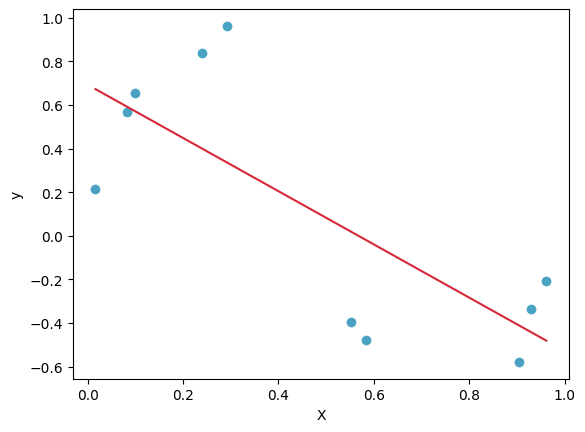

MSE: 0.005221 
RMSE: 0.072258 
MAE: 0.059916 
R2 Score: 98.338510% 
MAPE: 14.0544%


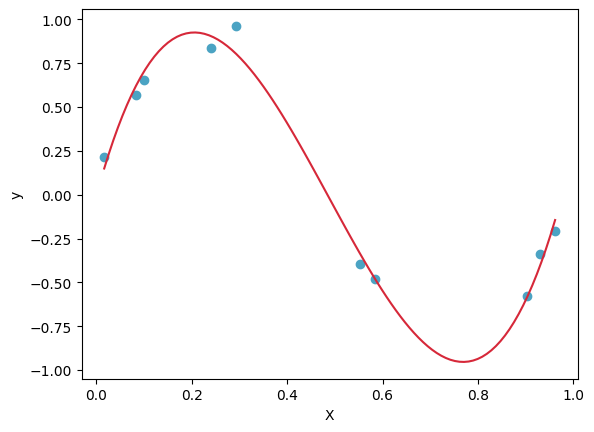

MSE: 0.002241 
RMSE: 0.047343 
MAE: 0.038461 
R2 Score: 99.286770% 
MAPE: 7.51556%


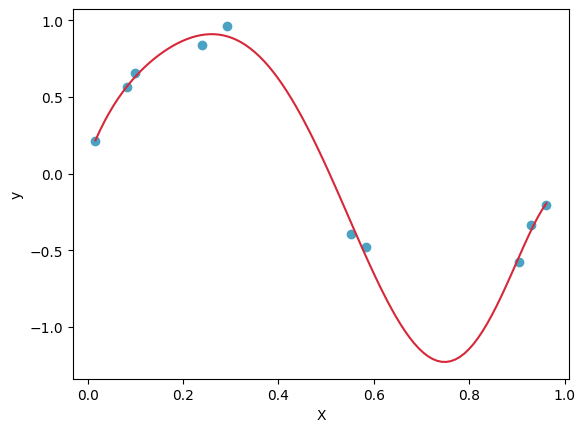

MSE: 0.000000 
RMSE: 0.000208 
MAE: 0.000172 
R2 Score: 99.999986% 
MAPE: 0.0462257%


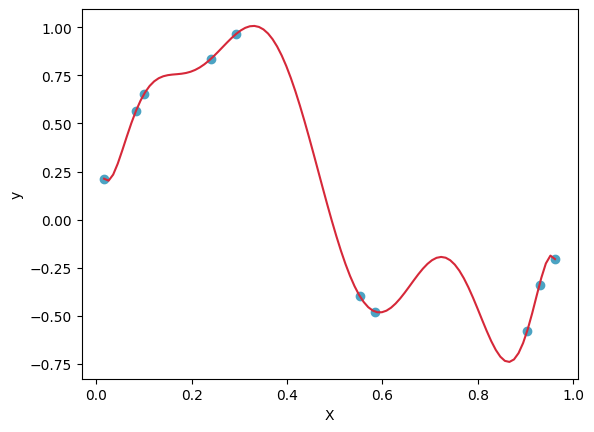

In [7]:
X = np.array([0.01642963, 0.08342244, 0.10029394, 0.24082878, 0.29214753, 
              0.55219247, 0.58447607, 0.90371974, 0.92952932, 0.96193638])
y = np.array([ 0.21301312,  0.56601113,  0.65329157,  0.83664456,  0.96270683, 
              -0.39589181, -0.47821268, -0.57853329, -0.33743546, -0.20516556])

degrees = [0, 1, 3, 6, 9]

# Plot the dataset
for deg in degrees:
    model = LinearRegression(degree=deg)
    model.fit(X, y)
    model.evaluate(X, y)
    model.plot(X, y)

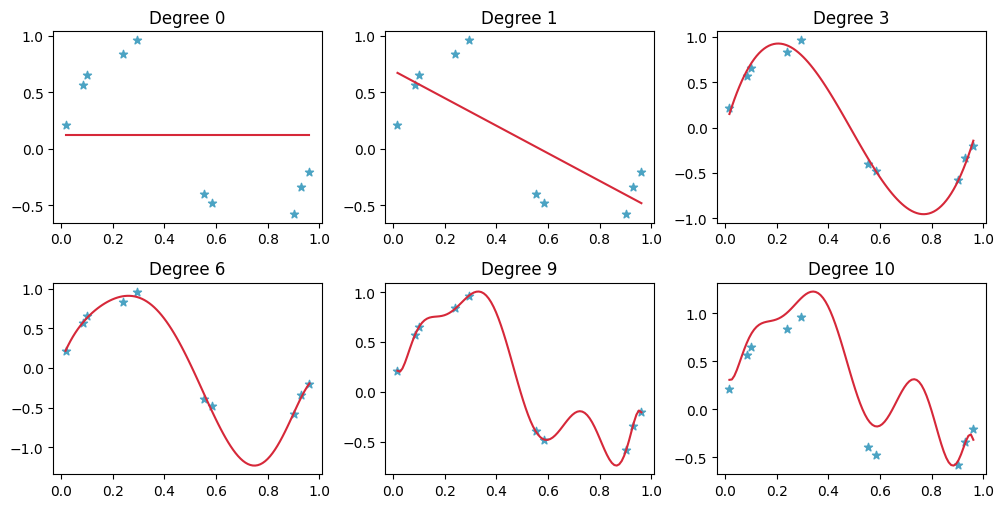

In [8]:
# # np.random.seed(0)
# size = 10
# low = 0
# high = 1

# # Generate dataset
# X = np.sort(np.random.uniform(low, high, size))
# y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, size)

X = np.array([0.01642963, 0.08342244, 0.10029394, 0.24082878, 0.29214753, 
              0.55219247, 0.58447607, 0.90371974, 0.92952932, 0.96193638])
y = np.array([ 0.21301312,  0.56601113,  0.65329157,  0.83664456,  0.96270683, 
              -0.39589181, -0.47821268, -0.57853329, -0.33743546, -0.20516556])

degrees = [0, 1, 3, 6, 9, 10]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

# Plot the dataset
for i, deg in enumerate(degrees):
    model = LinearRegression(degree=deg)
    model.fit(X, y)

    X_pred = np.linspace(X.min(), X.max(), 100)
    y_pred = model.predict(X_pred)

    ax = axs[i//3, i%3]
    ax.scatter(X, y, marker='*', color='#4BA3C3')
    ax.plot(X_pred, y_pred, color='#D62839')
    ax.set_title(f'Degree {deg}')
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

MSE: 0.009506 
RMSE: 0.097498 
MAE: 0.080662 
R2 Score: 98.058702% 
MAPE: 25.9582%


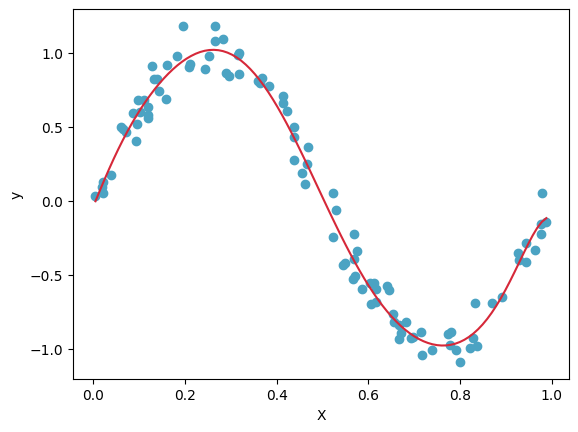

In [9]:
np.random.seed(0)

# Generate dataset
X = np.random.uniform(0, 1, 100)
y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, 100)

# Fit model
model = LinearRegression(degree=9)
model.fit(X, y)
model.evaluate(X, y)
model.plot(X, y)